# 1 - Introducción a pandas + numpy + matplotlib
Revisamos algunos **conceptos iniciales** de estas librerías para empezar a analizar datos. Para un tutorial inicial más completo ver [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1 - Los objetos de pandas: Series
Se puede construir un objeto `Series` con cualquier serie de valores. Las `Series` pueden entenderse como listas con **funcionalides adicionales**.

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [3]:
print("Suma:", s.sum(), "| Cantidad de valores:", s.count())

Suma: 23.0 | Cantidad de valores: 5


Las operaciones sobre `Series` son distintas que las operaciones sobre listas.

In [4]:
s * 2

0     2.0
1     6.0
2    10.0
3     NaN
4    12.0
5    16.0
dtype: float64

In [5]:
list(s) * 2

[1.0, 3.0, 5.0, nan, 6.0, 8.0, 1.0, 3.0, 5.0, nan, 6.0, 8.0]

Las `Series` pueden tener índices, además del mero índice posicional. Por ejemplo, se puede especificar un **índice temporal**.

In [6]:
# en este caso elegimos crear una serie de tiempo
s2 = pd.Series([1,3,5,np.nan,6,8], pd.date_range("20161123", "20161128"))
s2

2016-11-23    1.0
2016-11-24    3.0
2016-11-25    5.0
2016-11-26    NaN
2016-11-27    6.0
2016-11-28    8.0
Freq: D, dtype: float64

Todos los valores de las `Series` son del mismo **tipo de dato**. Pandas interpreta los valores de la `Series` para determinar el tipo de dato que mejor se ajuste a su contenido. Se puede **forzar un tipo de datos** distinto del interpretado por `pandas`.

In [7]:
s3 = pd.Series([1,3,5,0,6,8], pd.date_range("20161123", "20161128"), dtype=str)
s3

2016-11-23    1
2016-11-24    3
2016-11-25    5
2016-11-26    0
2016-11-27    6
2016-11-28    8
Freq: D, dtype: object

## 1.2 - Los objetos de pandas: DataFrame
Un `DataFrame` es un **conjunto de series** que tienen el mismo índice y la misma cantidad de valores. Si cada `Series` es el análogo a una lista, cada `DataFrame` es el análogo a una tabla.

In [8]:
df = pd.DataFrame({
        "serie_2": s2, 
        "serie_3": s3,
        "serie_4": [4, 3, 2, 23, 15, 30],
        "serie_5": np.array([300] * 6, dtype='int32')
    })
df

,serie_2,serie_3,serie_4,serie_5
2016-11-23,1.0,1,4,300
2016-11-24,3.0,3,3,300
2016-11-25,5.0,5,2,300
2016-11-26,NaN,0,23,300
2016-11-27,6.0,6,15,300
2016-11-28,8.0,8,30,300


Hay muchas formas de crear un `DataFrame`. `Pandas` tiene toda una serie de **funciones para leer distintos tipos de archivos tabulares** y cargarlos en un `DataFrame`.

In [9]:
df_personas = pd.read_csv("dataframe_example.csv")
df_personas

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F
2,15,Carlos Hale,M
3,20,Sofía Cilar,F


Las **columnas y las filas pueden utilizarse individualmente como series**. En el caso de las columnas, si no se utilizan espacios en los encabezados, incluso se pueden llamar como cualquier otro atributo de un `DataFrame`.

In [10]:
df_personas.sexo

0    M
1    F
2    M
3    F
Name: sexo, dtype: object

In [11]:
df_personas.sexo.unique()

array(['M', 'F'], dtype=object)

Una forma útil para obtener algunas **estadísticas sumarias**de los campos numéricos es el metodo `describe`

In [12]:
df_personas.describe()

,numero
count,4.000000
mean,119.750000
std,143.102236
min,15.000000
25%,18.750000
50%,71.500000
75%,172.500000
max,321.000000


### 1.2.1 - Ordenar un DataFrame
Podemos ordenar un `DataFrame` **por los valores de sus columnas**.

In [13]:
df_personas.sort_values("nombre_apellido")

,numero,nombre_apellido,sexo
2,15,Carlos Hale,M
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F
3,20,Sofía Cilar,F


In [14]:
df_personas.sort_values("numero")

,numero,nombre_apellido,sexo
2,15,Carlos Hale,M
3,20,Sofía Cilar,F
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F


Podemos ordenar un `DataFrame` **por los valores de sus índices**.

In [15]:
# ordena las filas
df_personas.sort_index(axis=0, ascending=False)

,numero,nombre_apellido,sexo
3,20,Sofía Cilar,F
2,15,Carlos Hale,M
1,321,Lucía Alvarez,F
0,123,Juan Pérez,M


In [16]:
# ordena las columnas
df_personas.sort_index(axis=1, ascending=False)

,sexo,numero,nombre_apellido
0,M,123,Juan Pérez
1,F,321,Lucía Alvarez
2,M,15,Carlos Hale
3,F,20,Sofía Cilar


### 1.2.2 - Seleccionar elementos en un DataFrame
Los objetos de tipo `DataFrame` soportan funcionalidades extendidas para los operadores **[ ]**. Estos **permiten seleccionar filas, columnas o combinaciones de éstas** dentro del `DataFrame`.

Para selccionar una columna, equivalente a `df_personas.sexo`

In [17]:
df_personas["sexo"]

0    M
1    F
2    M
3    F
Name: sexo, dtype: object

Para seleccionar **varias columnas al mismo tiempo**:

In [18]:
df_personas[["sexo", "nombre_apellido"]]

,sexo,nombre_apellido
0,M,Juan Pérez
1,F,Lucía Alvarez
2,M,Carlos Hale
3,F,Sofía Cilar


Selección por número de filas

In [19]:
df[0:2]

,serie_2,serie_3,serie_4,serie_5
2016-11-23,1.0,1,4,300
2016-11-24,3.0,3,3,300


Selección por etiqueta (índice) de fila

In [20]:
df["20161124":"20161126"]

,serie_2,serie_3,serie_4,serie_5
2016-11-24,3.0,3,3,300
2016-11-25,5.0,5,2,300
2016-11-26,NaN,0,23,300


Si se define una combinación de etiquetas (índices) de columna y fila, resulta equivalente a seleccionar una única celda

In [21]:
df.loc["20161124", "serie_3"]

'3'

Si se define una combinación de varias etiquetas, resulta en un subconjunto de valores

In [22]:
df.loc["20161124":"20161125", ["serie_3", "serie_5"]]

,serie_3,serie_5
2016-11-24,3,300
2016-11-25,5,300


In [23]:
df

,serie_2,serie_3,serie_4,serie_5
2016-11-23,1.0,1,4,300
2016-11-24,3.0,3,3,300
2016-11-25,5.0,5,2,300
2016-11-26,NaN,0,23,300
2016-11-27,6.0,6,15,300
2016-11-28,8.0,8,30,300


Es posible **seleccionar una posición especifica** mediante su índice de fila y columna

In [24]:
df.iloc[1, 3]

300

Y al especificar rangos de valores se selecciona un subjconjunto de celdas

In [25]:
df.iloc[1:3, 2:4]

,serie_4,serie_5
2016-11-24,3,300
2016-11-25,2,300


Si el subconjunto de celdas que se desea seleccionar no es contiguo, se pueden especificar a mano sus índices

In [26]:
df.iloc[[1, 2, 5], [2, 3]]

,serie_4,serie_5
2016-11-24,3,300
2016-11-25,2,300
2016-11-28,30,300


#### Selección por expresión booleana

In [27]:
df_personas

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F
2,15,Carlos Hale,M
3,20,Sofía Cilar,F


In [28]:
df_personas[[True, False, True, False]]

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
2,15,Carlos Hale,M


Los operadores nativos de Python usados para hacer comparaciones booleanas funcionan lugar a lugar dentro de una `Series`

In [29]:
df_personas.sexo == "M"

0     True
1    False
2     True
3    False
Name: sexo, dtype: bool

**Esto permite hacer queries facilmente.** Por ej, para seleccionar a las personas de sexo masculino dentro del `DataFrame` se usa un comparador booleano como selector

In [30]:
df_personas[df_personas.sexo == "M"]

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
2,15,Carlos Hale,M


Este tipo de comparaciones booleanas tambien pueden hacerse para un `DataFrame`

In [31]:
# Convertimos la serie 3 de 'df' a entero
df["serie_3"] = df["serie_3"].astype(int)
df > 3

,serie_2,serie_3,serie_4,serie_5
2016-11-23,False,False,True,True
2016-11-24,False,False,False,True
2016-11-25,True,True,False,True
2016-11-26,False,False,True,True
2016-11-27,True,True,True,True
2016-11-28,True,True,True,True


Este tipo de comparaciones tambien pueden hacerse para **visualizar queries dentro de un dataframe**.

In [32]:
df

,serie_2,serie_3,serie_4,serie_5
2016-11-23,1.0,1,4,300
2016-11-24,3.0,3,3,300
2016-11-25,5.0,5,2,300
2016-11-26,NaN,0,23,300
2016-11-27,6.0,6,15,300
2016-11-28,8.0,8,30,300


In [33]:
df[df > 3] # máscara sobre todos los valores del DataFrame

,serie_2,serie_3,serie_4,serie_5
2016-11-23,NaN,NaN,4.0,300
2016-11-24,NaN,NaN,NaN,300
2016-11-25,5.0,5.0,NaN,300
2016-11-26,NaN,NaN,23.0,300
2016-11-27,6.0,6.0,15.0,300
2016-11-28,8.0,8.0,30.0,300


La utilización de comparadores puede ser tan compleja como se desee. **Para concatenar condiciones se utiliza `&` como `and` y `|` como `or`**.

In [34]:
df[(df > 3) & (df < 300)]

,serie_2,serie_3,serie_4,serie_5
2016-11-23,NaN,NaN,4.0,NaN
2016-11-24,NaN,NaN,NaN,NaN
2016-11-25,5.0,5.0,NaN,NaN
2016-11-26,NaN,NaN,23.0,NaN
2016-11-27,6.0,6.0,15.0,NaN
2016-11-28,8.0,8.0,30.0,NaN


### 1.2.3 - Setear elementos en un DataFrame
Setear una nueva serie/columna automáticamente ubica los elementos en el lugar que le corresponden según el índice de la serie y del DataFrame. Los elementos que exceden el índice del DataFrame no se incorporan.

In [35]:
s4 = pd.Series([4, 3, 2, 6, 7, 5], index=pd.date_range('20161126', periods=6))
s4

2016-11-26    4
2016-11-27    3
2016-11-28    2
2016-11-29    6
2016-11-30    7
2016-12-01    5
Freq: D, dtype: int64

In [36]:
df["serie_6"] = s4
df

,serie_2,serie_3,serie_4,serie_5,serie_6
2016-11-23,1.0,1,4,300,NaN
2016-11-24,3.0,3,3,300,NaN
2016-11-25,5.0,5,2,300,NaN
2016-11-26,NaN,0,23,300,4.0
2016-11-27,6.0,6,15,300,3.0
2016-11-28,8.0,8,30,300,2.0


**Los mismos atributos que permiten seleccionar valores, permiten setear valores**.

In [37]:
df.loc[:, "serie_5"] = 500
df

,serie_2,serie_3,serie_4,serie_5,serie_6
2016-11-23,1.0,1,4,500,NaN
2016-11-24,3.0,3,3,500,NaN
2016-11-25,5.0,5,2,500,NaN
2016-11-26,NaN,0,23,500,4.0
2016-11-27,6.0,6,15,500,3.0
2016-11-28,8.0,8,30,500,2.0


In [38]:
df.loc["20161126", "serie_5"] = 900
df

,serie_2,serie_3,serie_4,serie_5,serie_6
2016-11-23,1.0,1,4,500,NaN
2016-11-24,3.0,3,3,500,NaN
2016-11-25,5.0,5,2,500,NaN
2016-11-26,NaN,0,23,900,4.0
2016-11-27,6.0,6,15,500,3.0
2016-11-28,8.0,8,30,500,2.0


In [39]:
df.iloc[:, 3] = "arbol"
# Cambiamos el tipo de esa serie a string para evitar 'warnings'
df['serie_5'] = df['serie_5'].astype(str)
df

/tmp/ipykernel_34030/3453808245.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'arbol' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.iloc[:, 3] = "arbol"


,serie_2,serie_3,serie_4,serie_5,serie_6
2016-11-23,1.0,1,4,arbol,NaN
2016-11-24,3.0,3,3,arbol,NaN
2016-11-25,5.0,5,2,arbol,NaN
2016-11-26,NaN,0,23,arbol,4.0
2016-11-27,6.0,6,15,arbol,3.0
2016-11-28,8.0,8,30,arbol,2.0


### 1.2.4 - Agrupar por categorías

In [40]:
df_personas

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F
2,15,Carlos Hale,M
3,20,Sofía Cilar,F


In [41]:
df_personas.groupby("sexo")

In [42]:
df_personas.groupby("sexo").count()

,numero,nombre_apellido
sexo,,
F,2,2
M,2,2


In [43]:
df_personas_nan = df_personas.copy()
df_personas_nan.loc[0, "numero"] = np.nan
df_personas_nan

,numero,nombre_apellido,sexo
0,NaN,Juan Pérez,M
1,321.0,Lucía Alvarez,F
2,15.0,Carlos Hale,M
3,20.0,Sofía Cilar,F


In [44]:
df_personas_nan.groupby("sexo").count()

,numero,nombre_apellido
sexo,,
F,2,2
M,1,2


## 1.3 - Graficar
Los objetos de `pandas` tienen un atributo `.plot` que es un **wrapper sobre matplotlib, que simplifica la creación de gráficos**. Además, `matplotlib` por default grafica en una ventana independiente a la consola que ejecuta los scripts. Para que Jupyter grafique dentro de la celda de output existe el comando magic `%matplotlib.inline` 

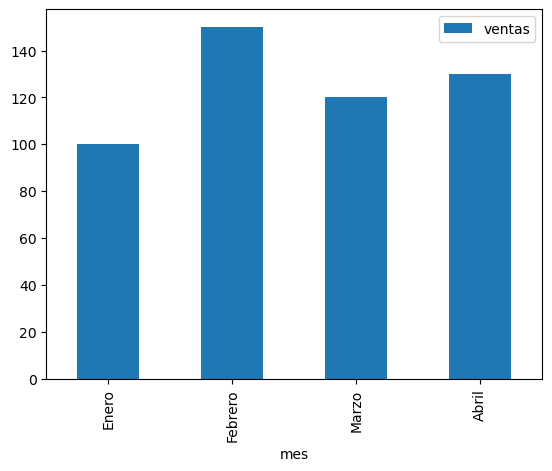

In [45]:
# Crear un DataFrame de ejemplo
df2 = pd.DataFrame({
    'mes': ['Enero', 'Febrero', 'Marzo', 'Abril'],
    'ventas': [100, 150, 120, 130]
})

# Graficar los datos
df2.plot(x='mes', y='ventas', kind='bar');

In [46]:
%matplotlib inline
plt.style.use("ggplot") # para que los gráficos sean más lindos

In [47]:
df

,serie_2,serie_3,serie_4,serie_5,serie_6
2016-11-23,1.0,1,4,arbol,NaN
2016-11-24,3.0,3,3,arbol,NaN
2016-11-25,5.0,5,2,arbol,NaN
2016-11-26,NaN,0,23,arbol,4.0
2016-11-27,6.0,6,15,arbol,3.0
2016-11-28,8.0,8,30,arbol,2.0


<Axes: >

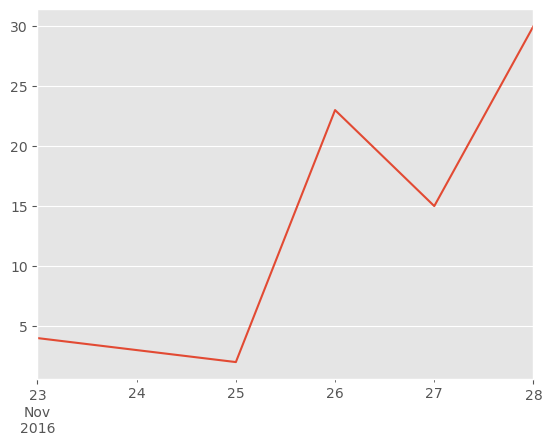

In [48]:
df.serie_4.plot.line()

<Axes: ylabel='Frequency'>

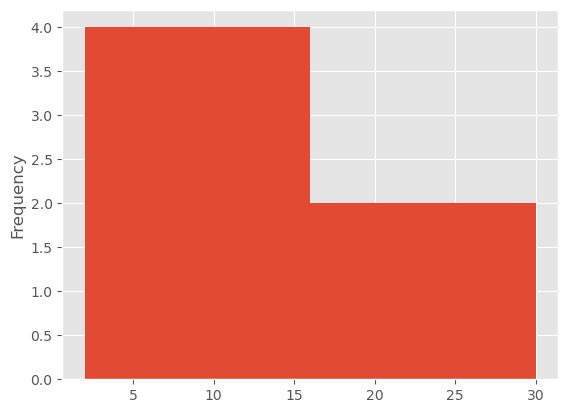

In [49]:
df.serie_4.plot.hist(bins=2)

<Axes: xlabel='serie_4', ylabel='serie_3'>

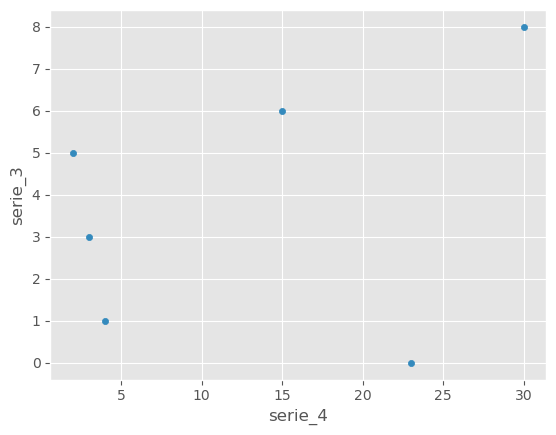

In [50]:
df.plot.scatter("serie_4", "serie_3")

In [51]:
# Ahora hacemos un gráfico tipo 'pie'
df.serie_4

2016-11-23     4
2016-11-24     3
2016-11-25     2
2016-11-26    23
2016-11-27    15
2016-11-28    30
Freq: D, Name: serie_4, dtype: int64

In [52]:
df.serie_4.value_counts()

serie_4
4     1
3     1
2     1
23    1
15    1
30    1
Name: count, dtype: int64

<Axes: ylabel='serie_4'>

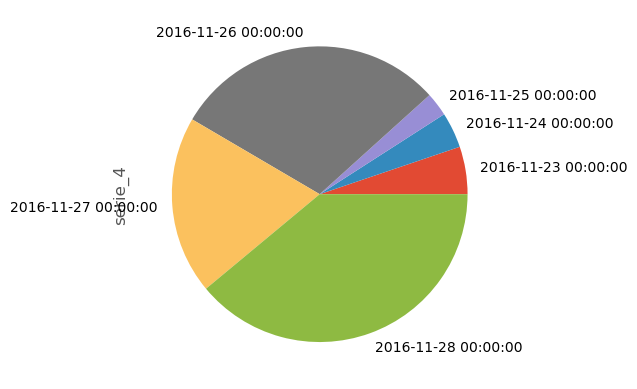

In [53]:
df["serie_4"].plot.pie(legend=False)

## 1.4 - Mergear `DataFrame`s
### 1.4.1 - Mergear mediante concatenación
Vamos a extender la información de un dataframe concatenándolo con otro que tiene **nuevas filas**.

In [54]:
df_personas

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F
2,15,Carlos Hale,M
3,20,Sofía Cilar,F


In [55]:
df_personas2 = pd.DataFrame({
        "numero": [400],
        "nombre_apellido": ["Ignacio Heredia"],
        "sexo": ["M"]
    })
df_personas2

,numero,nombre_apellido,sexo
0,400,Ignacio Heredia,M


In [56]:
# concatena dataframes "uno arriba del otro"
df_personas_concat = pd.concat([df_personas, df_personas2], ignore_index=True)
df_personas_concat

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F
2,15,Carlos Hale,M
3,20,Sofía Cilar,F
4,400,Ignacio Heredia,M


Vamos a extender la información de un dataframe concatenándolo con otro que tiene **nuevas columnas**.

In [57]:
df_personas3 = pd.DataFrame({"profesion": ["programador"]*3 + ["artista"]*2})

# axis = 1 para concatenar dataframes "uno al lado del otro"
pd.concat([df_personas_concat, df_personas3], axis=1)

,numero,nombre_apellido,sexo,profesion
0,123,Juan Pérez,M,programador
1,321,Lucía Alvarez,F,programador
2,15,Carlos Hale,M,programador
3,20,Sofía Cilar,F,artista
4,400,Ignacio Heredia,M,artista


### 1.4.2 - Merge
Vamos a mergear un dataframe con otro que contiene el nombre de los días de la semana, utilizando el índice de tiempo que tienen los dos.

In [58]:
df

,serie_2,serie_3,serie_4,serie_5,serie_6
2016-11-23,1.0,1,4,arbol,NaN
2016-11-24,3.0,3,3,arbol,NaN
2016-11-25,5.0,5,2,arbol,NaN
2016-11-26,NaN,0,23,arbol,4.0
2016-11-27,6.0,6,15,arbol,3.0
2016-11-28,8.0,8,30,arbol,2.0


In [59]:
date_range = pd.date_range("20161120", periods=10)

In [60]:
date_range

DatetimeIndex(['2016-11-20', '2016-11-21', '2016-11-22', '2016-11-23',
               '2016-11-24', '2016-11-25', '2016-11-26', '2016-11-27',
               '2016-11-28', '2016-11-29'],
              dtype='datetime64[ns]', freq='D')

In [61]:
df_dia_semana_ingles = pd.DataFrame({"dia_semana_ingles": date_range.day_name()}, index=date_range)
df_dia_semana_ingles

,dia_semana_ingles
2016-11-20,Sunday
2016-11-21,Monday
2016-11-22,Tuesday
2016-11-23,Wednesday
2016-11-24,Thursday
2016-11-25,Friday
2016-11-26,Saturday
2016-11-27,Sunday
2016-11-28,Monday
2016-11-29,Tuesday


In [62]:
# "left": el dataframe principal es el de la izquierda
merged_dia_semana = pd.merge(
    df, df_dia_semana_ingles, left_index=True, right_index=True, how="left")
merged_dia_semana

,serie_2,serie_3,serie_4,serie_5,serie_6,dia_semana_ingles
2016-11-23,1.0,1,4,arbol,NaN,Wednesday
2016-11-24,3.0,3,3,arbol,NaN,Thursday
2016-11-25,5.0,5,2,arbol,NaN,Friday
2016-11-26,NaN,0,23,arbol,4.0,Saturday
2016-11-27,6.0,6,15,arbol,3.0,Sunday
2016-11-28,8.0,8,30,arbol,2.0,Monday


In [63]:
# "right": el dataframe principal es el de la derecha
pd.merge(df, df_dia_semana_ingles, left_index=True, right_index=True, how="right")

,serie_2,serie_3,serie_4,serie_5,serie_6,dia_semana_ingles
2016-11-20,NaN,NaN,NaN,NaN,NaN,Sunday
2016-11-21,NaN,NaN,NaN,NaN,NaN,Monday
2016-11-22,NaN,NaN,NaN,NaN,NaN,Tuesday
2016-11-23,1.0,1.0,4.0,arbol,NaN,Wednesday
2016-11-24,3.0,3.0,3.0,arbol,NaN,Thursday
2016-11-25,5.0,5.0,2.0,arbol,NaN,Friday
2016-11-26,NaN,0.0,23.0,arbol,4.0,Saturday
2016-11-27,6.0,6.0,15.0,arbol,3.0,Sunday
2016-11-28,8.0,8.0,30.0,arbol,2.0,Monday
2016-11-29,NaN,NaN,NaN,NaN,NaN,Tuesday


In [64]:
# Invirtiendo el orden de los dataframes en la función 'merge' es como pasar de 'right' a 'left'
pd.merge(df_dia_semana_ingles, df, left_index=True, right_index=True, how="right")

,dia_semana_ingles,serie_2,serie_3,serie_4,serie_5,serie_6
2016-11-23,Wednesday,1.0,1,4,arbol,NaN
2016-11-24,Thursday,3.0,3,3,arbol,NaN
2016-11-25,Friday,5.0,5,2,arbol,NaN
2016-11-26,Saturday,NaN,0,23,arbol,4.0
2016-11-27,Sunday,6.0,6,15,arbol,3.0
2016-11-28,Monday,8.0,8,30,arbol,2.0


Vamos a **mergear dos dataframes utilizando una columna que tienen en común**, para traducir los días de la semana al español.

In [65]:
traduccion_dia_semana = pd.DataFrame({
    "dia_semana_ingles": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    "dia_semana_español": ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
})
traduccion_dia_semana

,dia_semana_ingles,dia_semana_español
0,Monday,Lunes
1,Tuesday,Martes
2,Wednesday,Miércoles
3,Thursday,Jueves
4,Friday,Viernes
5,Saturday,Sábado
6,Sunday,Domingo


In [66]:
pd.merge(merged_dia_semana, traduccion_dia_semana, on="dia_semana_ingles", how="left")

,serie_2,serie_3,serie_4,serie_5,serie_6,dia_semana_ingles,dia_semana_español
0,1.0,1,4,arbol,NaN,Wednesday,Miércoles
1,3.0,3,3,arbol,NaN,Thursday,Jueves
2,5.0,5,2,arbol,NaN,Friday,Viernes
3,NaN,0,23,arbol,4.0,Saturday,Sábado
4,6.0,6,15,arbol,3.0,Sunday,Domingo
5,8.0,8,30,arbol,2.0,Monday,Lunes
